In [58]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Importing the Dataset
df = pd.read_csv('Heart_Disease_data.csv')

In [60]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
80,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
211,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
676,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
708,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
788,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
493,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
88,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
551,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [62]:
# Checking Duplicates in the Dataset
df.duplicated().sum()

723

In [63]:
# Removing the Duplicate datapoints
df.drop_duplicates(inplace=True)

In [64]:
df.shape

(302, 14)

In [65]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


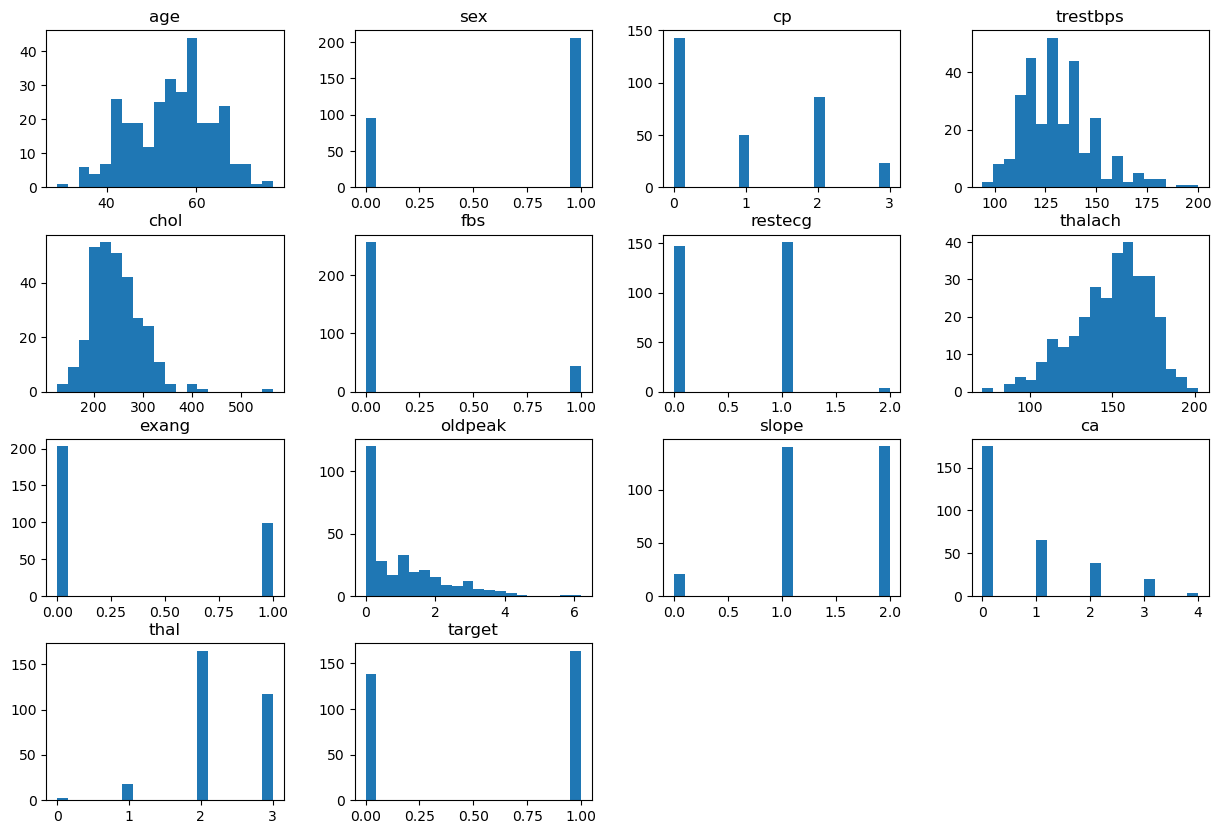

In [66]:
# Checking the Distribution of the features
df.hist(bins=20,grid=False,figsize=(15,10));

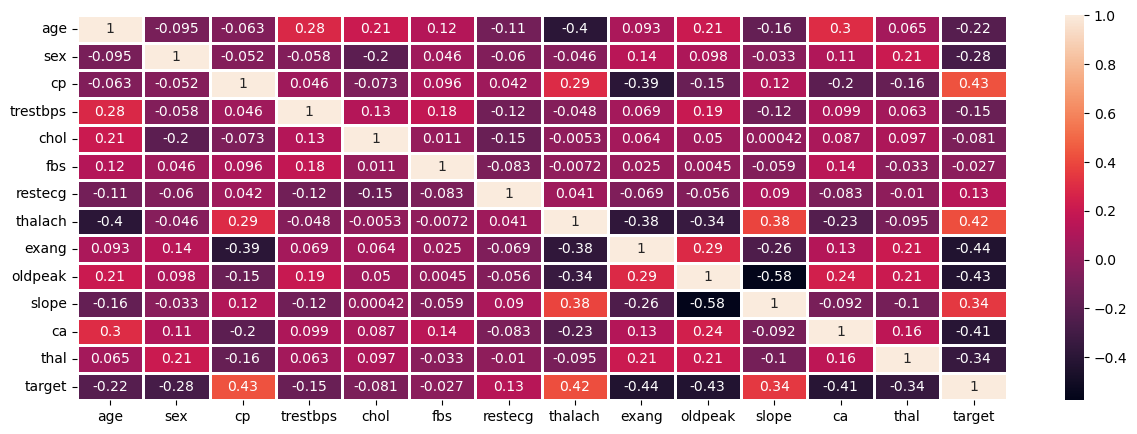

In [67]:
# understanding the correalation between the features
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

In [68]:
# Converting Target from  Numarical Data to Catogorical data

def convert(row):
    if row==1:
        return 'Heart_Disease'
    elif row==0:
        return 'No_Heart_Disease'

In [69]:
df['target1']=df['target'].apply(convert)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,No_Heart_Disease
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,No_Heart_Disease
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,No_Heart_Disease
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,No_Heart_Disease
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,No_Heart_Disease


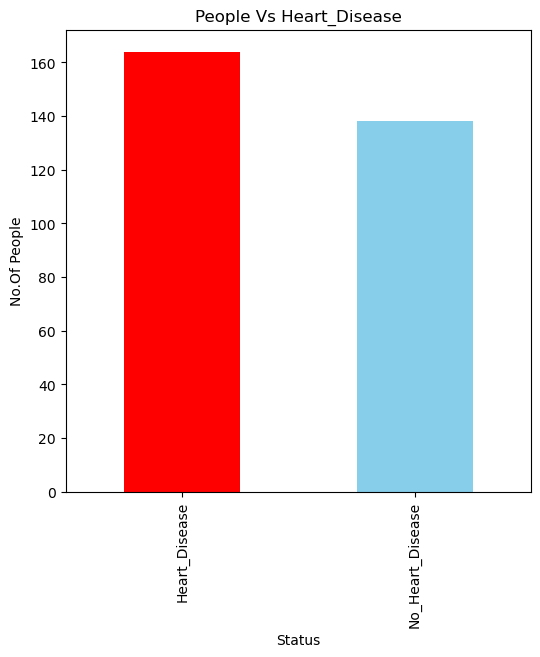

In [70]:
# Checking How many people Having Heart Dicease

plt.figure(figsize=(6,6))
df.target1.value_counts().plot(kind='bar',color=['red','skyblue'])
plt.ylabel('No.Of People')
plt.xlabel('Status')
plt.title('People Vs Heart_Disease')
plt.show()

In [71]:
x=df['sex'].value_counts()

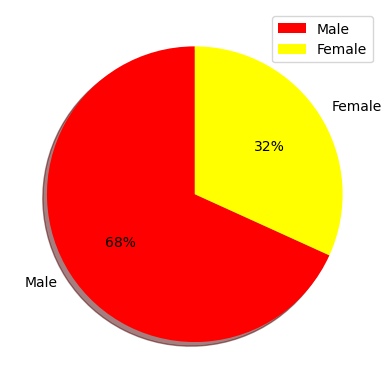

In [72]:
plt.pie(x,colors=['red','yellow'],startangle=90,shadow=True,autopct='%.f%%',labels=['Male','Female'])
plt.legend()
plt.show()

<Axes: xlabel='target1', ylabel='count'>

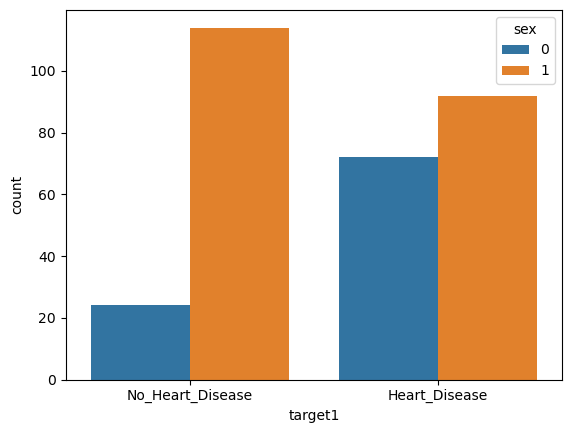

In [73]:
sns.countplot(data=df,x='target1',hue='sex')

In [74]:
Young = df[((df['age']>=20) & (df['age']<=35))]
Mid = df[((df['age']>=36) & (df['age']<=55))]
Older = df[(df['age']>56)]

In [75]:
l1=len(Young)
l2=len(Mid)
l3=len(Older)

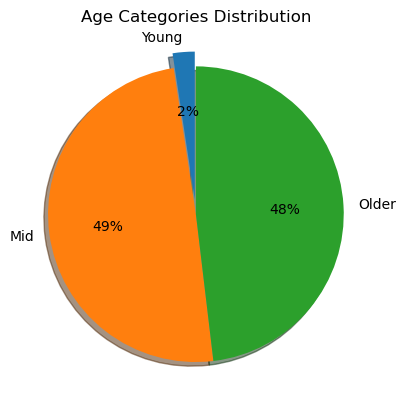

In [76]:
plt.pie(x=[l1,l2,l3],autopct='%.f%%',labels=['Young','Mid','Older'],explode=[0.1,0,0],shadow=True,startangle=90)
plt.title('Age Categories Distribution')
plt.show()

In [77]:
def age(row):
    if row<=35:
        return 'Young'
    elif row>65:
        return 'Older'
    else:
        return 'Mid'

In [78]:
df['age_cat']=df['age'].apply(age)

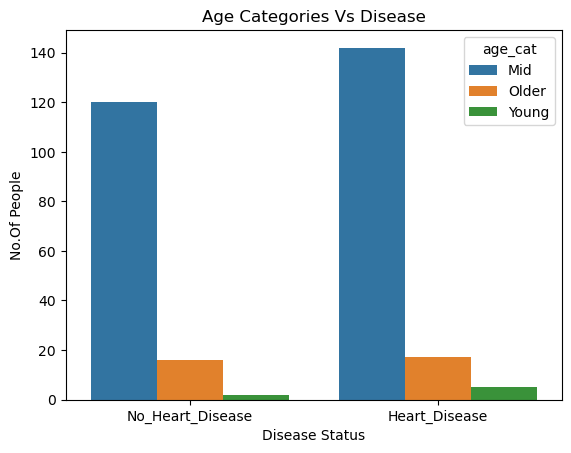

In [79]:
sns.countplot(data=df,x='target1',hue='age_cat')
plt.title('Age Categories Vs Disease')
plt.xlabel('Disease Status')
plt.ylabel('No.Of People')
plt.show()

In [80]:
df[((df['age_cat']=='Young') & (df['target1']=='Heart_Disease'))]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target1,age_cat
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,Heart_Disease,Young
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1,Heart_Disease,Young
143,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1,Heart_Disease,Young
256,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1,Heart_Disease,Young
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1,Heart_Disease,Young


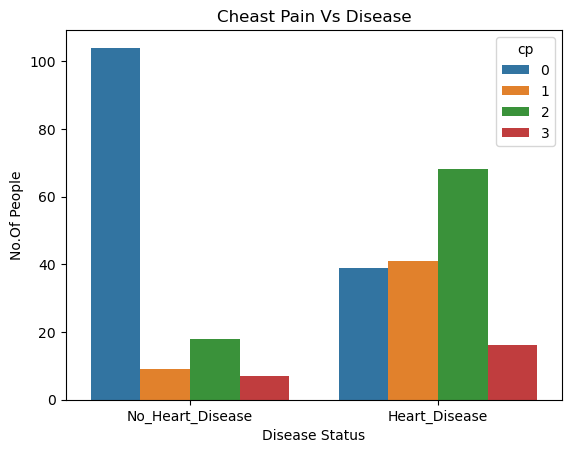

In [81]:
sns.countplot(data=df,x='target1',hue='cp')
plt.title('Cheast Pain Vs Disease')
plt.xlabel('Disease Status')
plt.ylabel('No.Of People')
plt.show()

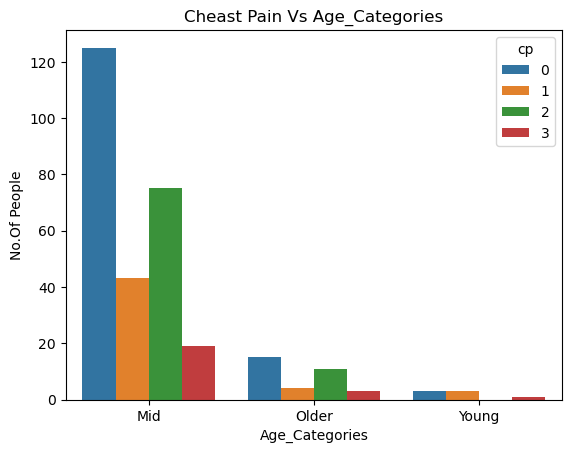

In [82]:
sns.countplot(data=df,x='age_cat',hue='cp')
plt.title('Cheast Pain Vs Age_Categories')
plt.xlabel('Age_Categories')
plt.ylabel('No.Of People')
plt.show()

In [83]:
def bp(row):
    if row<=129:
        return 'Normal'
    elif row>140:
        return 'High Risk'
    else:
        return 'Elevated'
    

In [84]:
df['bp']=df['trestbps'].apply(bp)

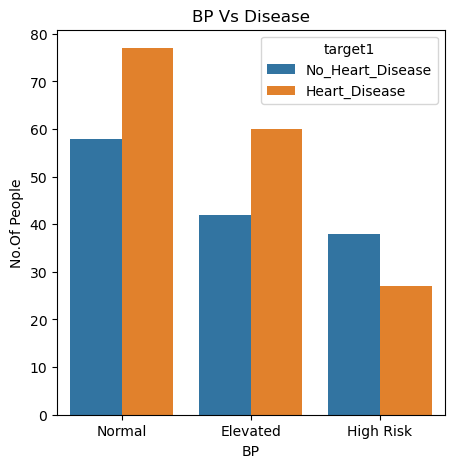

In [85]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='bp',hue='target1')
plt.title('BP Vs Disease')
plt.xlabel('BP')
plt.ylabel('No.Of People')
plt.show()

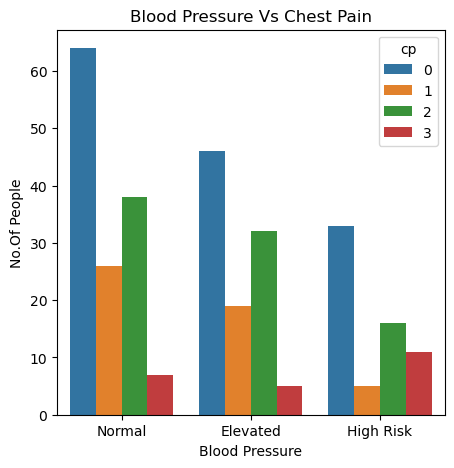

In [86]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='bp',hue='cp')
plt.title('Blood Pressure Vs Chest Pain')
plt.xlabel('Blood Pressure')
plt.ylabel('No.Of People')
plt.show()

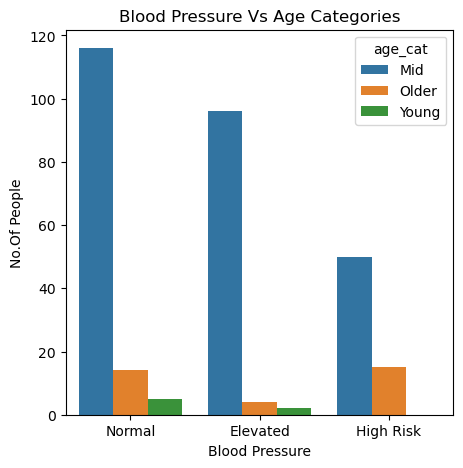

In [87]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='bp',hue='age_cat')
plt.title('Blood Pressure Vs Age Categories')
plt.xlabel('Blood Pressure')
plt.ylabel('No.Of People')
plt.show()

In [88]:
def chol(row):
    if row<=150:
        return 'Normal'
    elif row>200:
        return 'High'
    else:
        return 'BorderLine High'

In [89]:
df['chol_cc']=df['chol'].apply(chol)

In [90]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target1,age_cat,bp,chol_cc
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,No_Heart_Disease,Mid,Normal,High
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,No_Heart_Disease,Mid,Elevated,High
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,No_Heart_Disease,Older,High Risk,BorderLine High
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,No_Heart_Disease,Mid,High Risk,High
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,No_Heart_Disease,Mid,Elevated,High


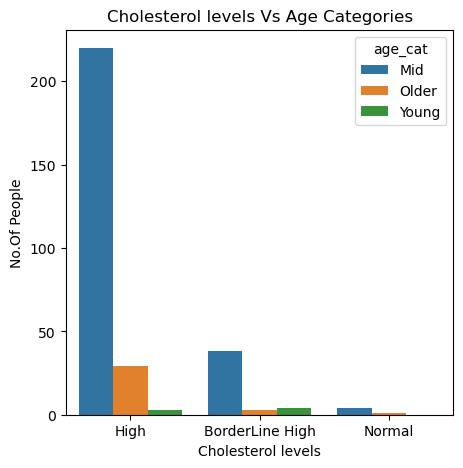

In [91]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='chol_cc',hue='age_cat')
plt.title('Cholesterol levels Vs Age Categories')
plt.xlabel('Cholesterol levels')
plt.ylabel('No.Of People')
plt.show()

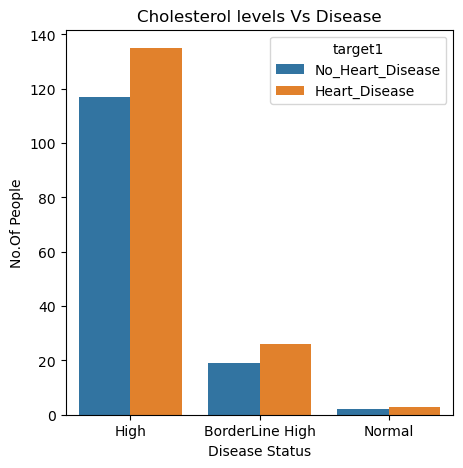

In [92]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='chol_cc',hue='target1')
plt.title('Cholesterol levels Vs Disease')
plt.xlabel('Disease Status')
plt.ylabel('No.Of People')
plt.show()

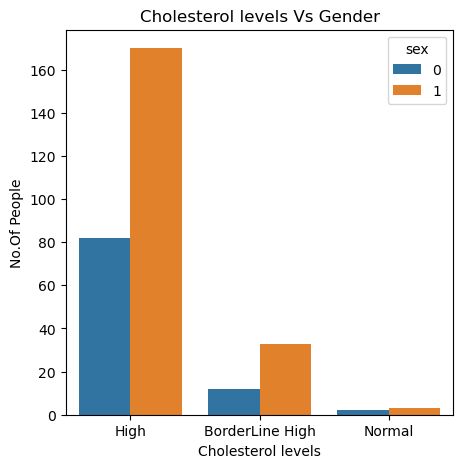

In [93]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='chol_cc',hue='sex')
plt.title('Cholesterol levels Vs Gender')
plt.xlabel('Cholesterol levels')
plt.ylabel('No.Of People')
plt.show()

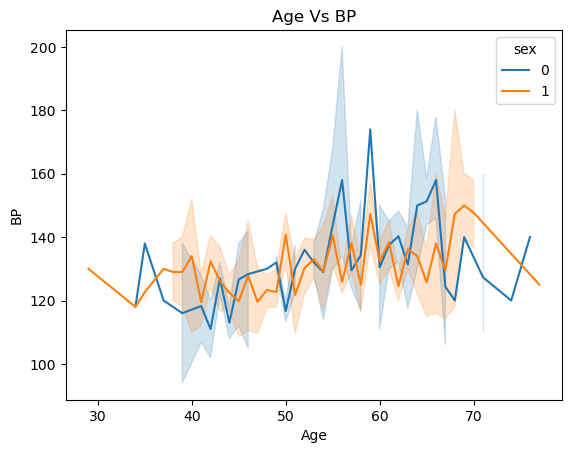

In [94]:
sns.lineplot(data=df,x='age',y='trestbps',hue='sex')
plt.title('Age Vs BP')
plt.xlabel('Age')
plt.ylabel('BP')
plt.show()

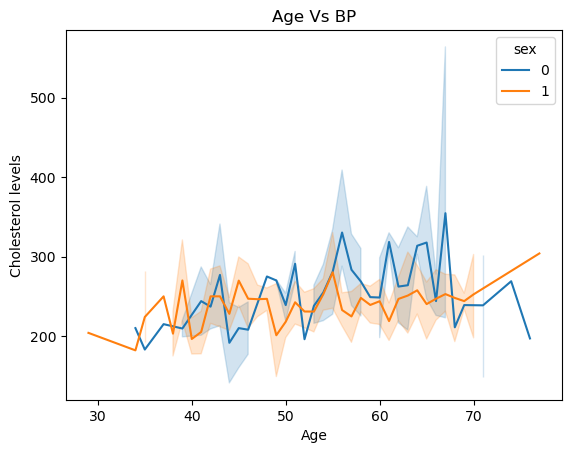

In [95]:
sns.lineplot(data=df,x='age',y='chol',hue='sex')
plt.title('Age Vs BP')
plt.xlabel('Age')
plt.ylabel('Cholesterol levels')
plt.show()

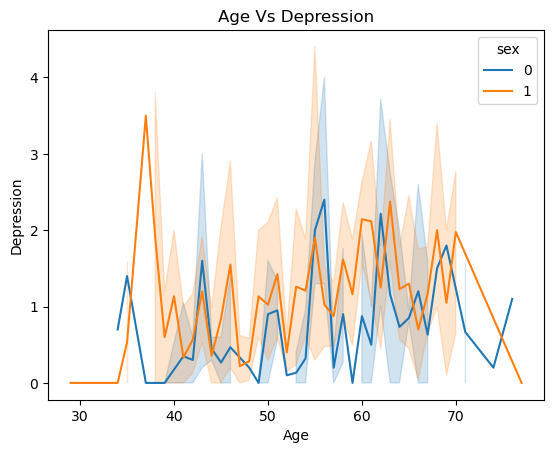

In [96]:
sns.lineplot(data=df,x='age',y='oldpeak',hue='sex')
plt.title('Age Vs Depression')
plt.xlabel('Age')
plt.ylabel('Depression')
plt.show()

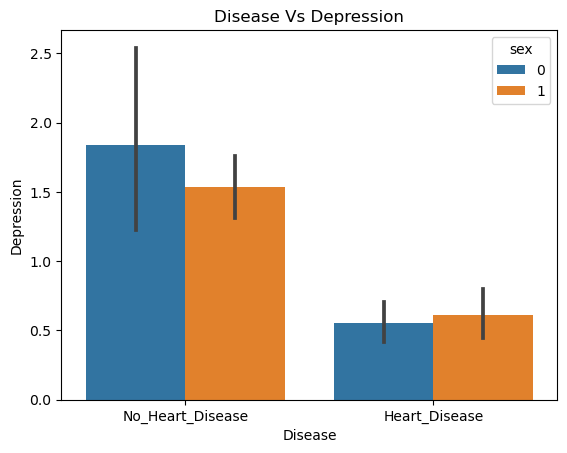

In [97]:
sns.barplot(data=df,x='target1',y='oldpeak',hue='sex')
plt.title('Disease Vs Depression')
plt.xlabel('Disease')
plt.ylabel('Depression')
plt.show()

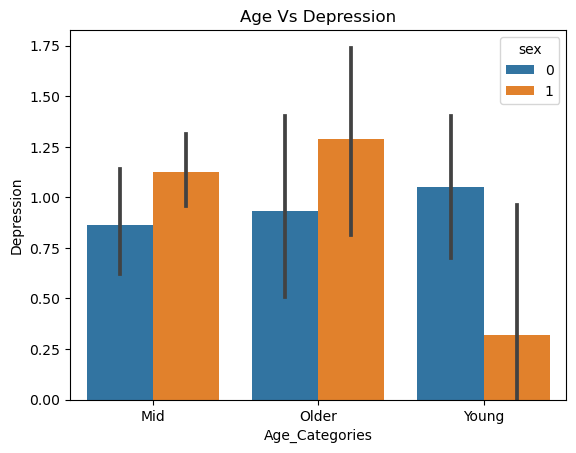

In [98]:
sns.barplot(data=df,x='age_cat',y='oldpeak',hue='sex')
plt.title('Age Vs Depression')
plt.xlabel('Age_Categories')
plt.ylabel('Depression')
plt.show()

In [99]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target1,age_cat,bp,chol_cc
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,No_Heart_Disease,Mid,Normal,High
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,No_Heart_Disease,Mid,Elevated,High
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,No_Heart_Disease,Older,High Risk,BorderLine High
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,No_Heart_Disease,Mid,High Risk,High
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,No_Heart_Disease,Mid,Elevated,High


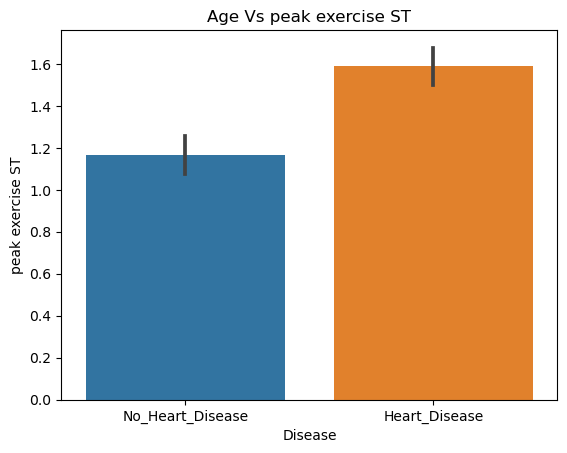

In [100]:
sns.barplot(data=df,x='target1',y='slope')
plt.title('Age Vs peak exercise ST')
plt.xlabel('Disease')
plt.ylabel('peak exercise ST')
plt.show()

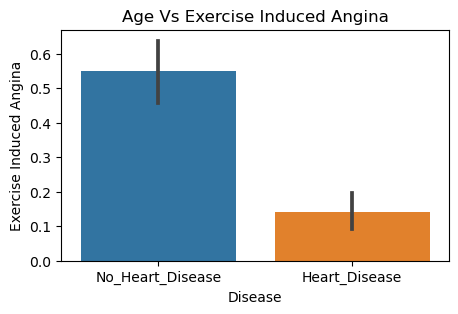

In [116]:
plt.figure(figsize=(5,3))
sns.barplot(data=df,x='target1',y='exang') #exercise induced angina
plt.title('Age Vs Exercise Induced Angina')
plt.xlabel('Disease')
plt.ylabel('Exercise Induced Angina')
plt.show()


In [102]:
# if you are suffering from Angina then Excerise will make your symtoms worse

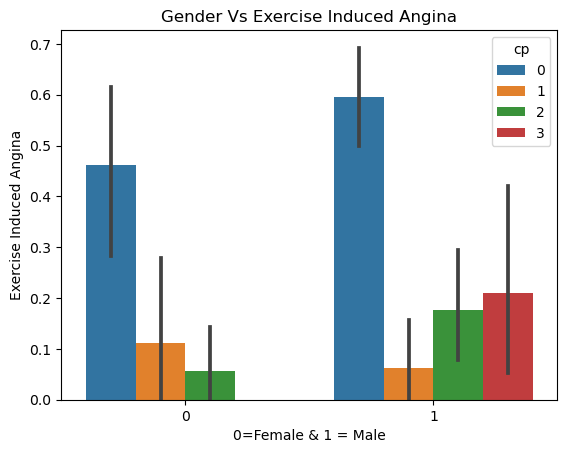

In [103]:
sns.barplot(data=df,x='sex',y='exang',hue='cp')
plt.title('Gender Vs Exercise Induced Angina')
plt.xlabel('0=Female & 1 = Male')
plt.ylabel('Exercise Induced Angina')
plt.show()


In [104]:
# males having high Excerise Angina
# Type of Cheastpain due to low flow of blood to heart

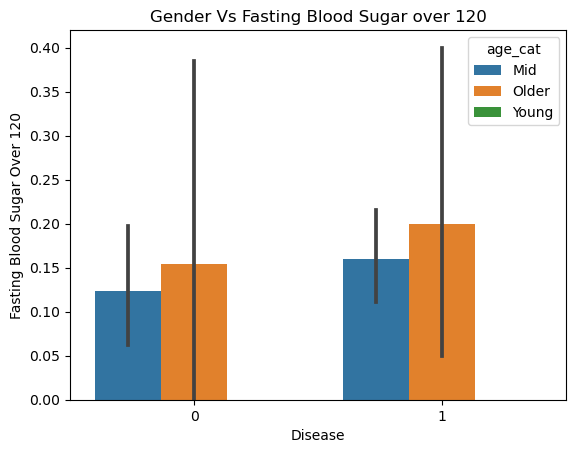

In [105]:


sns.barplot(data=df,x='sex',y='fbs',hue='age_cat')
plt.title('Gender Vs Fasting Blood Sugar over 120')
plt.xlabel('Disease')
plt.ylabel('Fasting Blood Sugar Over 120')
plt.show()

In [106]:
# older Males have high fasting blood sugar over 120

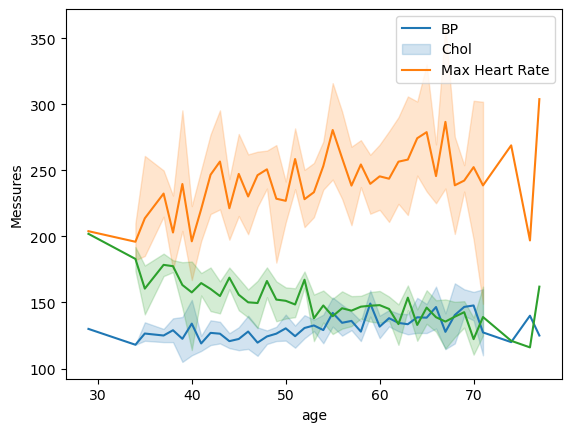

In [107]:
sns.lineplot(data=df,x='age',y='trestbps')
sns.lineplot(data=df,x='age',y='chol')
sns.lineplot(data=df,x='age',y='thalach')
plt.ylabel('Messures')
plt.legend(labels=['BP','Chol','Max Heart Rate'])

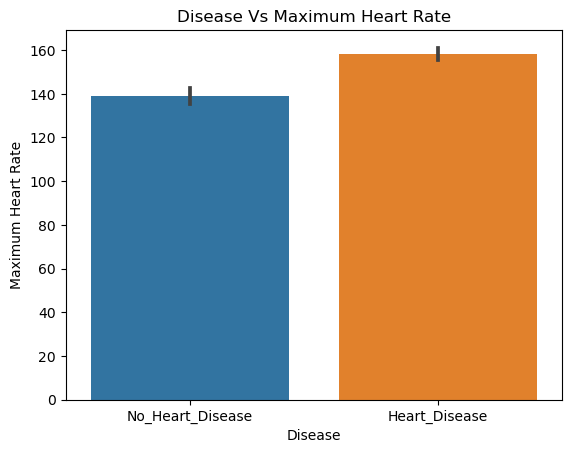

In [108]:
sns.barplot(data=df,x='target1',y='thalach')
plt.title('Disease Vs Maximum Heart Rate')
plt.xlabel('Disease')
plt.ylabel('Maximum Heart Rate')
plt.show()

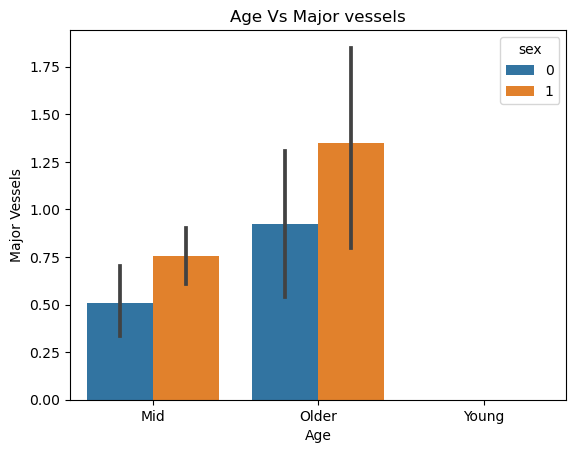

In [109]:
sns.barplot(data=df,x='age_cat',y='ca',hue='sex')
plt.title('Age Vs Major vessels')
plt.xlabel('Age')
plt.ylabel('Major Vessels')
plt.show()

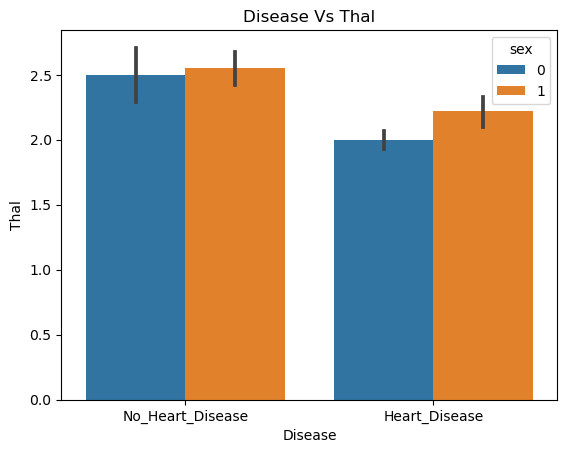

In [110]:
sns.barplot(data=df,x='target1',y='thal',hue='sex')
plt.title('Disease Vs Thal')
plt.xlabel('Disease')
plt.ylabel('Thal')
plt.show()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target1,age_cat,bp,chol_cc
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,No_Heart_Disease,Mid,Normal,High
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,No_Heart_Disease,Mid,Elevated,High
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,No_Heart_Disease,Older,High Risk,BorderLine High
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,No_Heart_Disease,Mid,High Risk,High
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,No_Heart_Disease,Mid,Elevated,High
